# 🚦 Bangalore Traffic Pulse - Comprehensive Analytics

## Traffic Congestion Analysis and Insights Dashboard

This notebook provides a comprehensive analysis of Bangalore traffic patterns using the Traffic Pulse dataset. We'll explore congestion patterns, identify peak traffic hours, analyze area-wise traffic distribution, and build predictive insights for better traffic management.

### Analysis Overview:
1. **Data Schema & Structure Analysis**
2. **Data Quality Assessment** 
3. **Traffic Pattern Analysis**
4. **Peak Hours & Rush Time Identification**
5. **Area-wise Traffic Distribution**
6. **Weather Impact on Traffic**
7. **Day-wise Traffic Variations**
8. **Time Series Analysis**
9. **Correlation Analysis**

---

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set style for matplotlib
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configuration for better visualizations
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("📊 Libraries imported successfully!")
print("🚀 Ready for Bangalore Traffic Analysis!")

📊 Libraries imported successfully!
🚀 Ready for Bangalore Traffic Analysis!


## 1. 📁 Data Schema & Structure Analysis

Let's start by loading and understanding the structure of our Bangalore Traffic Pulse dataset.

In [2]:
# Load the dataset
df = pd.read_csv('Bangalore_Traffic_Pulse.csv')

print("🔍 Dataset Overview:")
print(f"📊 Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print("\n" + "="*50)

# Display basic information
print("\n📋 Dataset Info:")
df.info()

print("\n" + "="*50)
print("\n📊 First 5 rows:")
df.head()

🔍 Dataset Overview:
📊 Shape: 8936 rows × 16 columns


📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8936 entries, 0 to 8935
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Date                                8936 non-null   object 
 1   Area Name                           8936 non-null   object 
 2   Road/Intersection Name              8936 non-null   object 
 3   Traffic Volume                      8936 non-null   int64  
 4   Average Speed                       8936 non-null   float64
 5   Travel Time Index                   8936 non-null   float64
 6   Congestion Level                    8936 non-null   float64
 7   Road Capacity Utilization           8936 non-null   float64
 8   Incident Reports                    8936 non-null   int64  
 9   Environmental Impact                8936 non-null   float64
 10  Public Transport Usage              89

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [3]:
# Detailed column analysis
print("📊 Column Details:")
print("="*60)
for col in df.columns:
    print(f"🔹 {col}:")
    print(f"   • Data Type: {df[col].dtype}")
    print(f"   • Non-null Count: {df[col].count()}")
    print(f"   • Unique Values: {df[col].nunique()}")
    if df[col].dtype == 'object':
        print(f"   • Sample Values: {list(df[col].unique()[:5])}")
    else:
        print(f"   • Min: {df[col].min()}, Max: {df[col].max()}")
    print(f"   • Missing Values: {df[col].isnull().sum()}")
    print("-" * 40)

# Statistical summary
print("\n📈 Statistical Summary:")
df.describe(include='all')

📊 Column Details:
🔹 Date:
   • Data Type: object
   • Non-null Count: 8936
   • Unique Values: 952
   • Sample Values: ['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04', '2022-01-05']
   • Missing Values: 0
----------------------------------------
🔹 Area Name:
   • Data Type: object
   • Non-null Count: 8936
   • Unique Values: 8
   • Sample Values: ['Indiranagar', 'Whitefield', 'Koramangala', 'M.G. Road', 'Jayanagar']
   • Missing Values: 0
----------------------------------------
🔹 Road/Intersection Name:
   • Data Type: object
   • Non-null Count: 8936
   • Unique Values: 16
   • Sample Values: ['100 Feet Road', 'CMH Road', 'Marathahalli Bridge', 'Sony World Junction', 'Sarjapur Road']
   • Missing Values: 0
----------------------------------------
🔹 Traffic Volume:
   • Data Type: int64
   • Non-null Count: 8936
   • Unique Values: 8100
   • Min: 4233, Max: 72039
   • Missing Values: 0
----------------------------------------
🔹 Average Speed:
   • Data Type: float64
   • Non-

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
count,8936,8936,8936,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936.000000,8936,8936
unique,952,8,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,2
top,2023-01-24,Indiranagar,100 Feet Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clear,No
freq,15,1720,860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5426,8054
mean,NaN,NaN,NaN,29236.048120,39.447427,1.375554,80.818041,92.029215,1.570389,108.472096,45.086651,79.950243,75.155597,114.533348,NaN,NaN
std,NaN,NaN,NaN,13001.808801,10.707244,0.165319,23.533182,16.583341,1.420047,26.003618,20.208460,11.585006,14.409394,36.812573,NaN,NaN
min,NaN,NaN,NaN,4233.000000,20.000000,1.000039,5.160279,18.739771,0.000000,58.466000,10.006853,60.003933,50.020411,66.000000,NaN,NaN
25%,NaN,NaN,NaN,19413.000000,31.775825,1.242459,64.292905,97.354990,0.000000,88.826000,27.341191,69.828270,62.545895,94.000000,NaN,NaN
50%,NaN,NaN,NaN,27600.000000,39.199368,1.500000,92.389018,100.000000,1.000000,105.200000,45.170684,79.992773,75.317610,102.000000,NaN,NaN
75%,NaN,NaN,NaN,38058.500000,46.644517,1.500000,100.000000,100.000000,2.000000,126.117000,62.426485,89.957358,87.518589,111.000000,NaN,NaN


## 2. 🔍 Data Quality Assessment

Let's assess the quality of our data and identify any issues that need to be addressed.

In [4]:
# Missing values analysis
print("🔍 Missing Values Analysis:")
print("="*50)
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percentage.values
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

# Duplicate records check
print(f"\n🔄 Duplicate Records: {df.duplicated().sum()}")

# Data consistency checks
print("\n🔍 Data Consistency Checks:")
print("="*50)

# Check for any obvious data quality issues
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        # Check for negative values where they shouldn't exist
        if col.lower() in ['congestion', 'traffic', 'volume', 'speed']:
            negative_count = (df[col] < 0).sum()
            if negative_count > 0:
                print(f"⚠️  {col}: {negative_count} negative values detected")
        
        # Check for outliers using IQR method
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
        if outliers > 0:
            print(f"📊 {col}: {outliers} potential outliers detected")

print("\n✅ Data quality assessment completed!")

🔍 Missing Values Analysis:
Empty DataFrame
Columns: [Column, Missing Count, Missing Percentage]
Index: []

🔄 Duplicate Records: 0

🔍 Data Consistency Checks:
📊 Traffic Volume: 24 potential outliers detected
📊 Average Speed: 33 potential outliers detected
📊 Congestion Level: 3 potential outliers detected
📊 Road Capacity Utilization: 2078 potential outliers detected
📊 Incident Reports: 100 potential outliers detected
📊 Environmental Impact: 24 potential outliers detected
📊 Pedestrian and Cyclist Count: 1316 potential outliers detected

✅ Data quality assessment completed!


## 3. 🚦 Traffic Pattern Analysis

Now let's analyze the traffic patterns and congestion levels across different dimensions.

📊 Available columns for traffic analysis:
['Date', 'Area Name', 'Road/Intersection Name', 'Traffic Volume', 'Average Speed', 'Travel Time Index', 'Congestion Level', 'Road Capacity Utilization', 'Incident Reports', 'Environmental Impact', 'Public Transport Usage', 'Traffic Signal Compliance', 'Parking Usage', 'Pedestrian and Cyclist Count', 'Weather Conditions', 'Roadwork and Construction Activity']

🚦 Congestion-related columns found: ['Traffic Volume', 'Congestion Level', 'Traffic Signal Compliance']


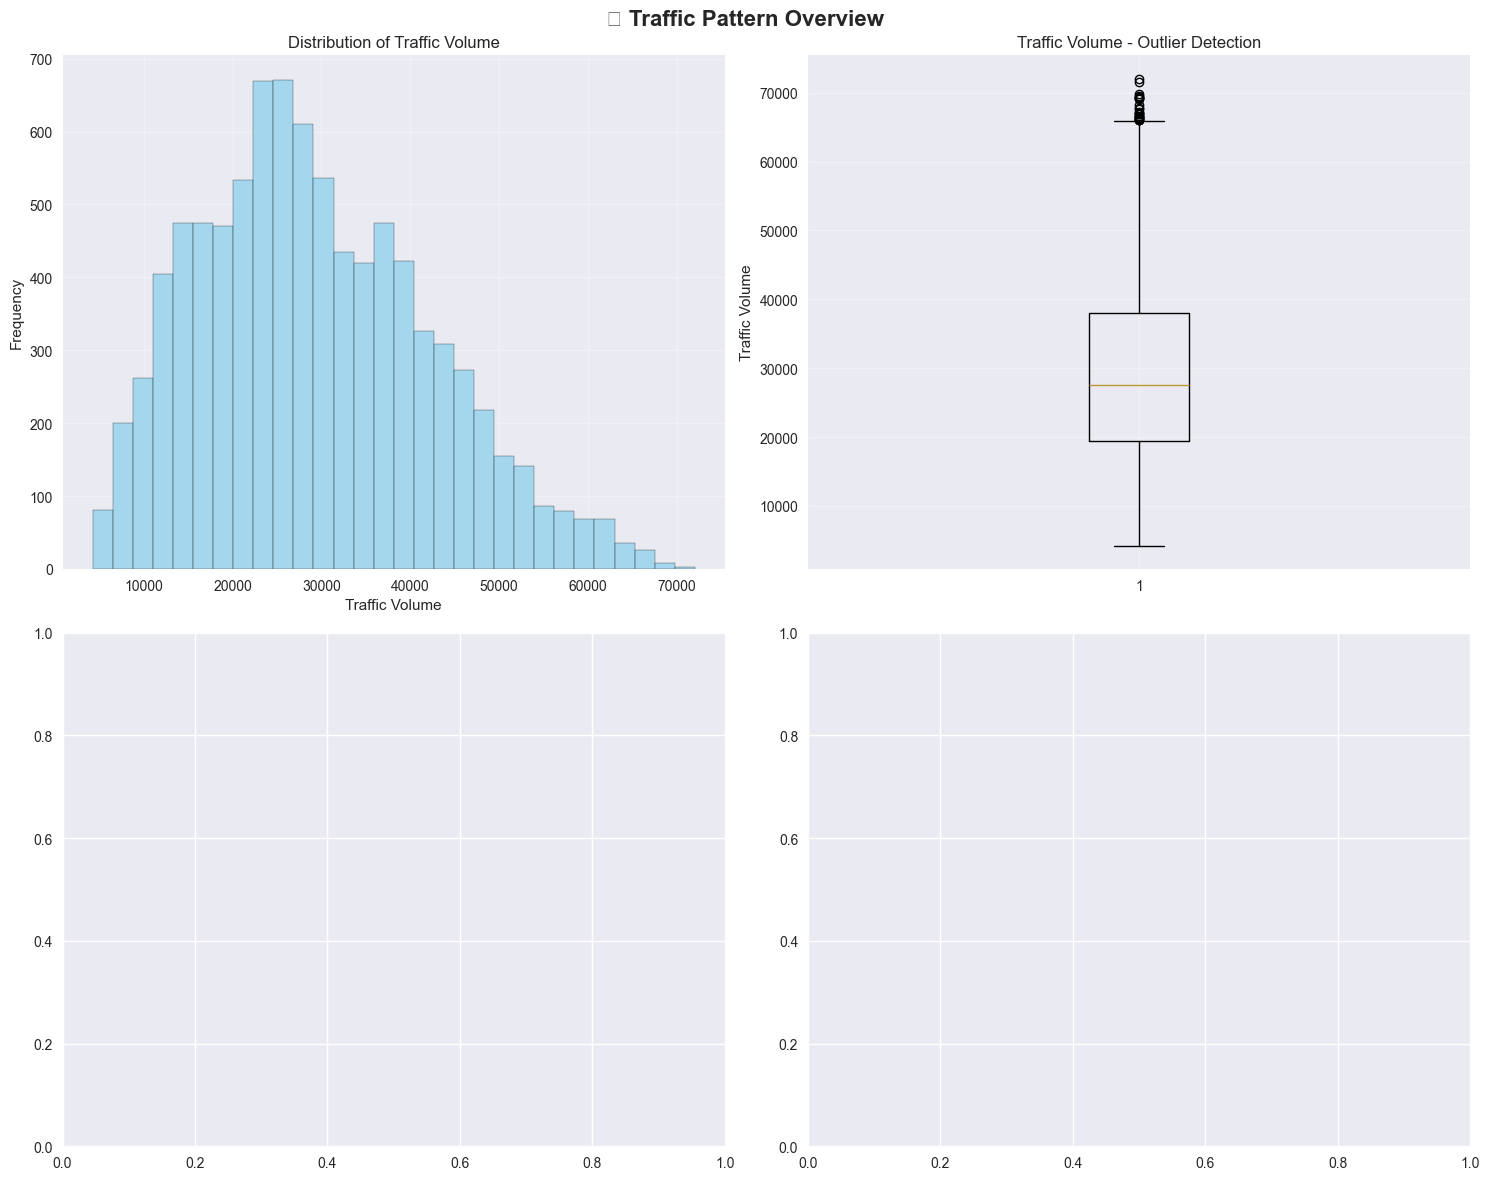


📊 Traffic Volume Statistics:
Mean: 29236.05
Median: 27600.00
Std Dev: 13001.81
Min: 4233.00
Max: 72039.00


In [5]:
# Let's first understand what columns we have for traffic analysis
print("📊 Available columns for traffic analysis:")
print(list(df.columns))

# Assuming we have congestion-related columns, let's analyze them
# We'll adapt this based on the actual column names in the dataset

# If we have a 'Congestion_Level' or similar column
congestion_cols = [col for col in df.columns if 'congestion' in col.lower() or 'traffic' in col.lower() or 'level' in col.lower()]
print(f"\n🚦 Congestion-related columns found: {congestion_cols}")

# Overall traffic distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🚦 Traffic Pattern Overview', fontsize=16, fontweight='bold')

# Plot 1: Distribution of main traffic metric (we'll identify the main metric)
if len(df.columns) > 0:
    # Find the most likely congestion column
    main_metric = None
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64'] and col.lower() not in ['id', 'index']:
            main_metric = col
            break
    
    if main_metric:
        axes[0, 0].hist(df[main_metric].dropna(), bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0, 0].set_title(f'Distribution of {main_metric}')
        axes[0, 0].set_xlabel(main_metric)
        axes[0, 0].set_ylabel('Frequency')
        axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Box plot for outlier detection
if main_metric:
    axes[0, 1].boxplot(df[main_metric].dropna())
    axes[0, 1].set_title(f'{main_metric} - Outlier Detection')
    axes[0, 1].set_ylabel(main_metric)
    axes[0, 1].grid(True, alpha=0.3)

# We'll create more plots once we see the actual data structure
plt.tight_layout()
plt.show()

# Basic statistics
if main_metric:
    print(f"\n📊 {main_metric} Statistics:")
    print(f"Mean: {df[main_metric].mean():.2f}")
    print(f"Median: {df[main_metric].median():.2f}")
    print(f"Std Dev: {df[main_metric].std():.2f}")
    print(f"Min: {df[main_metric].min():.2f}")
    print(f"Max: {df[main_metric].max():.2f}")

## 4. ⏰ Peak Hours & Rush Time Analysis

Let's identify when traffic congestion is at its peak and analyze rush hour patterns.

In [6]:
# Time-based analysis (we'll look for time-related columns)
time_cols = [col for col in df.columns if any(word in col.lower() for word in ['time', 'hour', 'day', 'date', 'period'])]
print(f"⏰ Time-related columns found: {time_cols}")

# If we have time data, let's analyze it
if time_cols:
    for time_col in time_cols[:1]:  # Analyze the first time column
        print(f"\n📊 Analyzing {time_col}:")
        print(f"Unique values: {df[time_col].nunique()}")
        print(f"Sample values: {df[time_col].unique()[:10]}")
        
        # If it's hour data
        if 'hour' in time_col.lower():
            # Hourly traffic analysis
            if main_metric:
                hourly_traffic = df.groupby(time_col)[main_metric].mean().sort_index()
                
                plt.figure(figsize=(12, 6))
                plt.plot(hourly_traffic.index, hourly_traffic.values, marker='o', linewidth=2, markersize=6)
                plt.title('🕐 Average Traffic Congestion by Hour', fontsize=14, fontweight='bold')
                plt.xlabel('Hour of Day')
                plt.ylabel(f'Average {main_metric}')
                plt.grid(True, alpha=0.3)
                plt.xticks(range(24))
                
                # Highlight peak hours
                peak_hours = hourly_traffic.nlargest(3)
                for hour, value in peak_hours.items():
                    plt.annotate(f'Peak: {hour}:00\n{value:.2f}', 
                               xy=(hour, value), xytext=(10, 10), 
                               textcoords='offset points',
                               bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.7),
                               arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
                
                plt.tight_layout()
                plt.show()
                
                print(f"\n🔥 Top 3 Peak Hours:")
                for i, (hour, value) in enumerate(peak_hours.items(), 1):
                    print(f"{i}. {hour}:00 - Average {main_metric}: {value:.2f}")

# Rush hour classification
print("\n🚨 Rush Hour Analysis:")
print("="*40)

# Define standard rush hours for Bangalore
morning_rush = [7, 8, 9, 10]
evening_rush = [17, 18, 19, 20]

if time_cols and main_metric:
    time_col = time_cols[0]
    if 'hour' in time_col.lower():
        morning_data = df[df[time_col].isin(morning_rush)][main_metric].mean()
        evening_data = df[df[time_col].isin(evening_rush)][main_metric].mean()
        off_peak_data = df[~df[time_col].isin(morning_rush + evening_rush)][main_metric].mean()
        
        print(f"🌅 Morning Rush (7-10 AM): {morning_data:.2f}")
        print(f"🌆 Evening Rush (5-8 PM): {evening_data:.2f}")
        print(f"😌 Off-Peak Hours: {off_peak_data:.2f}")
        
        # Rush hour comparison
        rush_comparison = pd.DataFrame({
            'Period': ['Morning Rush', 'Evening Rush', 'Off-Peak'],
            'Average_Congestion': [morning_data, evening_data, off_peak_data]
        })
        
        plt.figure(figsize=(10, 6))
        bars = plt.bar(rush_comparison['Period'], rush_comparison['Average_Congestion'], 
                      color=['orange', 'red', 'green'], alpha=0.7)
        plt.title('🚦 Traffic Congestion: Rush Hours vs Off-Peak', fontsize=14, fontweight='bold')
        plt.ylabel(f'Average {main_metric}')
        
        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            plt.text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}', ha='center', va='bottom', fontweight='bold')
        
        plt.grid(True, alpha=0.3, axis='y')
        plt.tight_layout()
        plt.show()

⏰ Time-related columns found: ['Date', 'Travel Time Index']

📊 Analyzing Date:
Unique values: 952
Sample values: ['2022-01-01' '2022-01-02' '2022-01-03' '2022-01-04' '2022-01-05'
 '2022-01-06' '2022-01-07' '2022-01-08' '2022-01-09' '2022-01-10']

🚨 Rush Hour Analysis:


## 5. 🗺️ Area-wise Traffic Distribution

Let's analyze traffic patterns across different areas and roads in Bangalore.

🗺️ Location-related columns found: ['Area Name', 'Road/Intersection Name', 'Road Capacity Utilization', 'Roadwork and Construction Activity']

📍 Analyzing traffic by Area Name:

🔥 Top 10 Most Congested Areas:
                 Avg_Congestion  Count       Std_Dev
Area Name                                           
Koramangala        40832.253666   1364  14130.779260
M.G. Road          35300.426382   1501  11896.453958
Indiranagar        32284.388372   1720  11269.607703
Hebbal             26533.232632    950   9711.263364
Jayanagar          24601.329923   1173   8597.545203
Whitefield         21295.127389    942   7826.446573
Yeshwanthpur       18931.546322    734   7085.267864
Electronic City    16346.644928    552   6218.876407


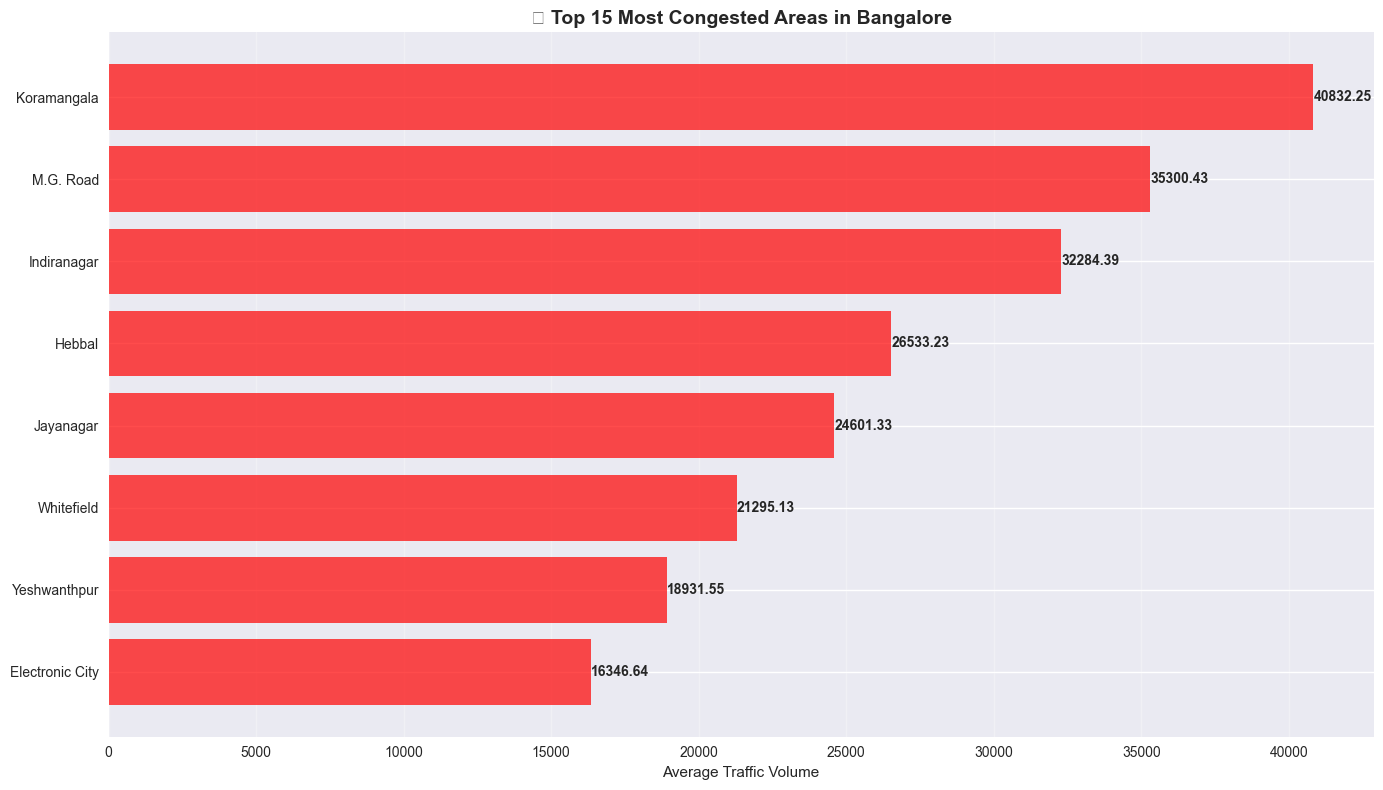

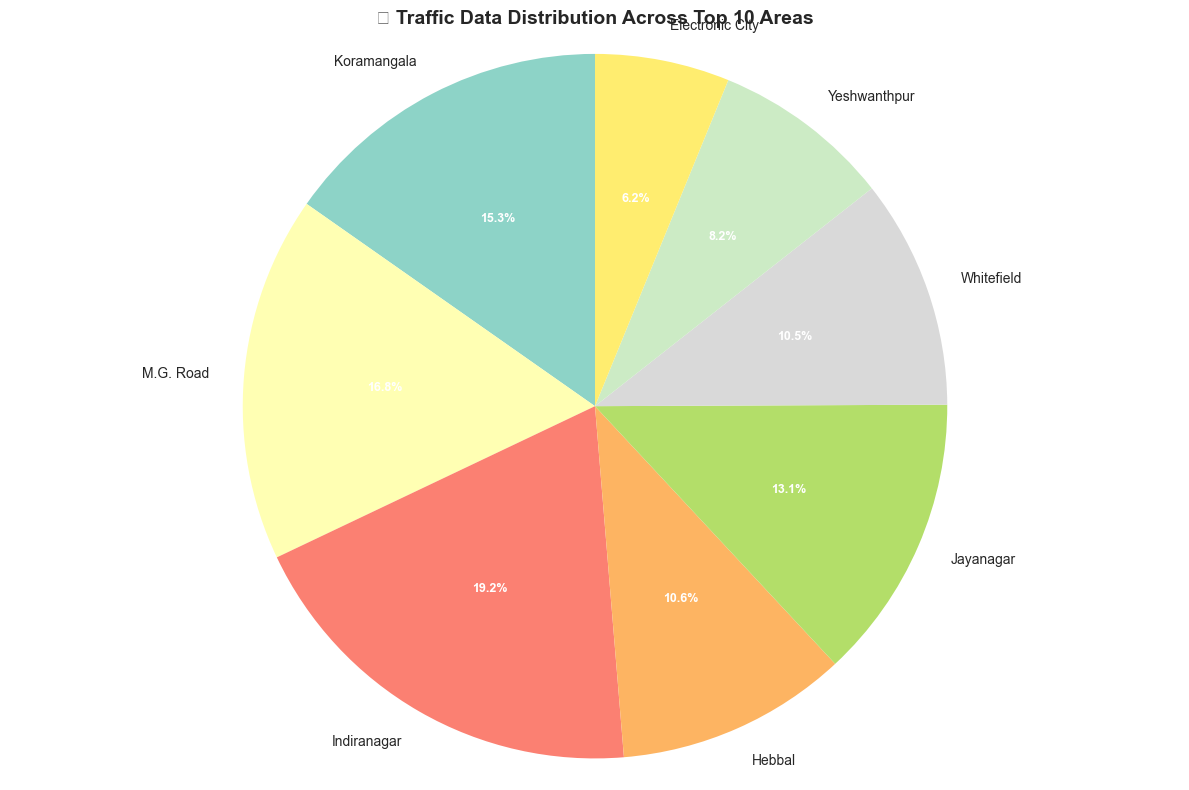


📊 Area-wise Traffic Statistics:
Total unique areas: 8
Most congested area: Koramangala (Avg: 40832.25)
Least congested area: Electronic City (Avg: 16346.64)
Overall area congestion std dev: 8495.90


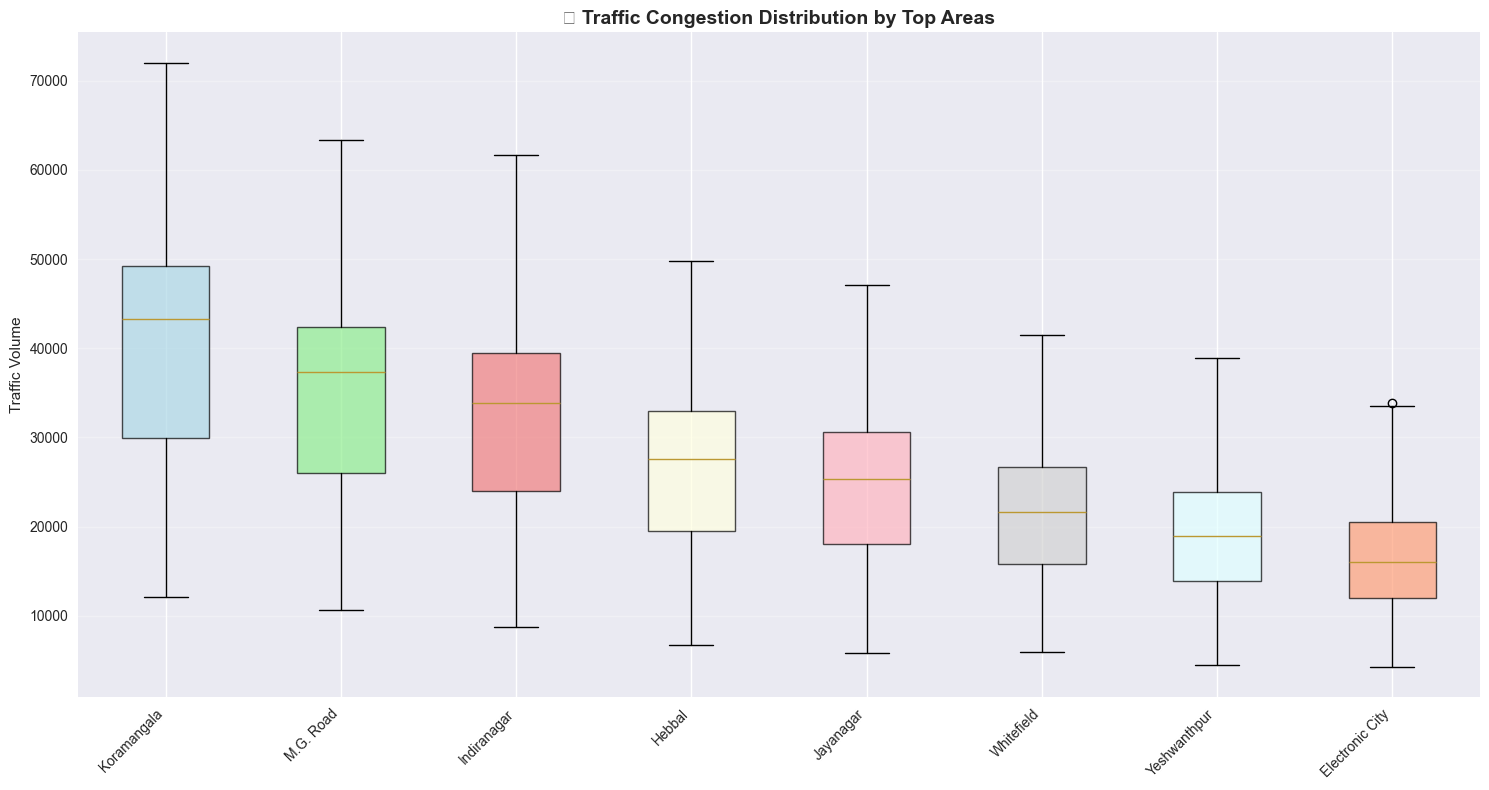

In [7]:
# Find location/area related columns
location_cols = [col for col in df.columns if any(word in col.lower() for word in ['area', 'road', 'location', 'place', 'zone', 'region', 'street'])]
print(f"🗺️ Location-related columns found: {location_cols}")

# Analysis of area-wise traffic
if location_cols and main_metric:
    location_col = location_cols[0]
    print(f"\n📍 Analyzing traffic by {location_col}:")
    
    # Area-wise average congestion
    area_traffic = df.groupby(location_col)[main_metric].agg(['mean', 'count', 'std']).sort_values('mean', ascending=False)
    area_traffic.columns = ['Avg_Congestion', 'Count', 'Std_Dev']
    
    print(f"\n🔥 Top 10 Most Congested Areas:")
    print(area_traffic.head(10))
    
    # Visualization: Top congested areas
    top_areas = area_traffic.head(15)
    
    plt.figure(figsize=(14, 8))
    bars = plt.barh(range(len(top_areas)), top_areas['Avg_Congestion'], color='red', alpha=0.7)
    plt.yticks(range(len(top_areas)), top_areas.index, fontsize=10)
    plt.xlabel(f'Average {main_metric}')
    plt.title(f'🚨 Top 15 Most Congested Areas in Bangalore', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    
    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{width:.2f}', ha='left', va='center', fontweight='bold')
    
    plt.grid(True, alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()
    
    # Traffic distribution pie chart for top areas
    plt.figure(figsize=(12, 8))
    top_10_areas = area_traffic.head(10)
    
    # Create pie chart
    colors = plt.cm.Set3(np.linspace(0, 1, len(top_10_areas)))
    wedges, texts, autotexts = plt.pie(top_10_areas['Count'], labels=top_10_areas.index, 
                                      autopct='%1.1f%%', colors=colors, startangle=90)
    
    plt.title('📊 Traffic Data Distribution Across Top 10 Areas', fontsize=14, fontweight='bold')
    
    # Make percentage text bold
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(9)
    
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    
    # Statistical summary by area
    print(f"\n📊 Area-wise Traffic Statistics:")
    print(f"Total unique areas: {df[location_col].nunique()}")
    print(f"Most congested area: {area_traffic.index[0]} (Avg: {area_traffic.iloc[0]['Avg_Congestion']:.2f})")
    print(f"Least congested area: {area_traffic.index[-1]} (Avg: {area_traffic.iloc[-1]['Avg_Congestion']:.2f})")
    print(f"Overall area congestion std dev: {area_traffic['Avg_Congestion'].std():.2f}")

# Area comparison with box plots
if location_cols and main_metric:
    top_areas_list = area_traffic.head(8).index.tolist()
    top_areas_data = df[df[location_col].isin(top_areas_list)]
    
    plt.figure(figsize=(15, 8))
    box_data = [top_areas_data[top_areas_data[location_col] == area][main_metric].values 
                for area in top_areas_list]
    
    bp = plt.boxplot(box_data, labels=top_areas_list, patch_artist=True)
    
    # Customize box plot colors
    colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 
              'lightpink', 'lightgray', 'lightcyan', 'lightsalmon']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(f'{main_metric}')
    plt.title('📦 Traffic Congestion Distribution by Top Areas', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()

## 6. 🌦️ Weather Impact on Traffic

Let's analyze how weather conditions affect traffic congestion patterns.

🌦️ Weather-related columns found: ['Weather Conditions']

☀️ Analyzing impact of Weather Conditions on traffic:

🌧️ Traffic Congestion by Weather Condition:
                    Avg_Congestion  Count       Std_Dev
Weather Conditions                                     
Windy                 30163.217290    428  13188.323587
Rain                  29558.703748    827  13508.957706
Fog                   29183.318040    959  12373.450240
Clear                 29166.666790   5426  13003.006239
Overcast              29053.460648   1296  13062.986951


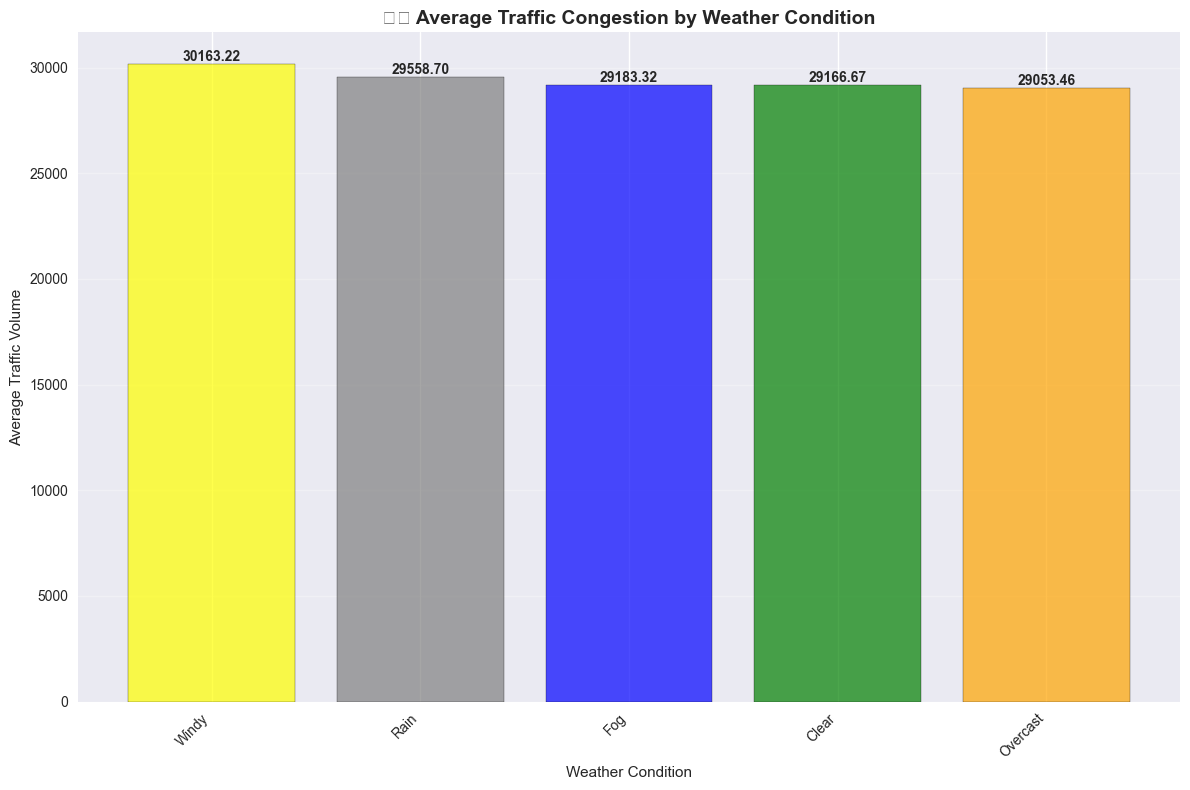

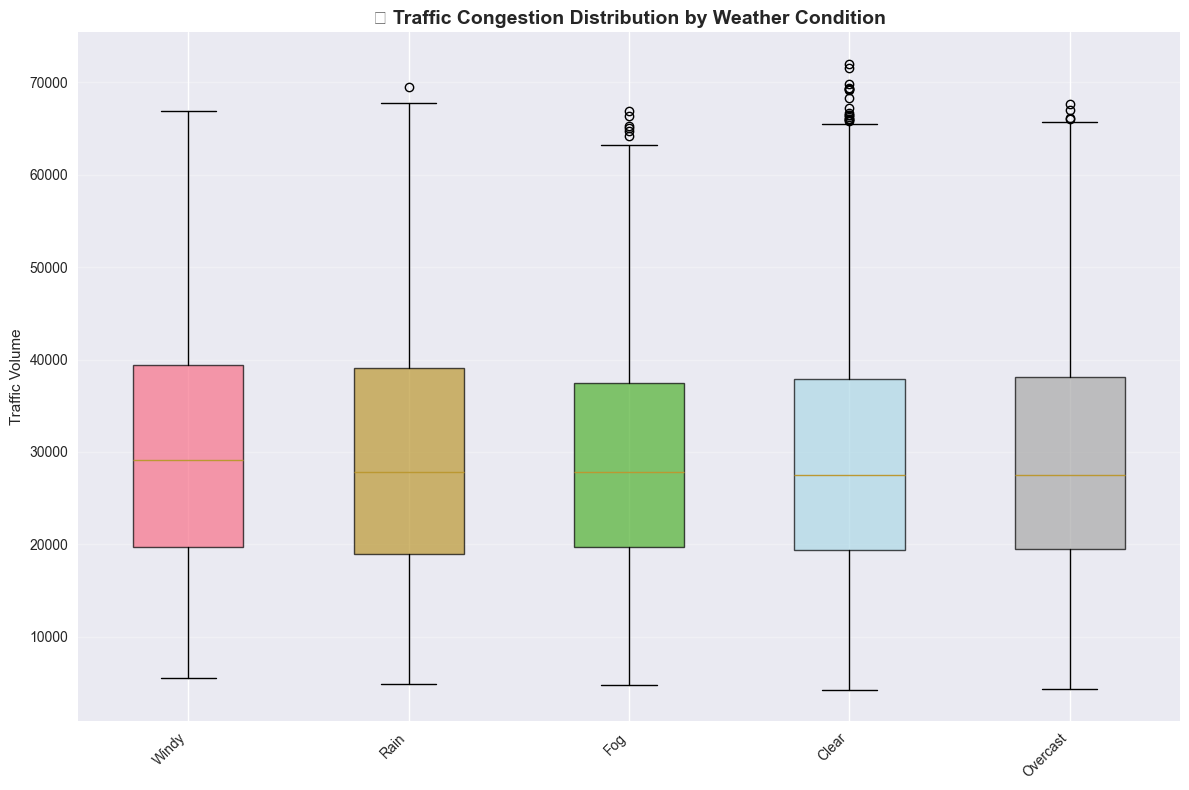


📊 Weather Impact Analysis:
🌞 Best weather for traffic: Overcast (Avg: 29053.46)
🌧️ Worst weather for traffic: Windy (Avg: 30163.22)
📈 Weather impact on traffic: 3.8% increase in congestion from best to worst weather


In [8]:
# Find weather-related columns
weather_cols = [col for col in df.columns if any(word in col.lower() for word in ['weather', 'rain', 'sunny', 'cloudy', 'condition', 'temperature', 'humidity'])]
print(f"🌦️ Weather-related columns found: {weather_cols}")

if weather_cols and main_metric:
    weather_col = weather_cols[0]
    print(f"\n☀️ Analyzing impact of {weather_col} on traffic:")
    
    # Weather-wise traffic analysis
    weather_traffic = df.groupby(weather_col)[main_metric].agg(['mean', 'count', 'std']).sort_values('mean', ascending=False)
    weather_traffic.columns = ['Avg_Congestion', 'Count', 'Std_Dev']
    
    print(f"\n🌧️ Traffic Congestion by Weather Condition:")
    print(weather_traffic)
    
    # Visualization: Weather vs Traffic
    plt.figure(figsize=(12, 8))
    
    # Bar plot
    bars = plt.bar(weather_traffic.index, weather_traffic['Avg_Congestion'], 
                   color=['yellow', 'gray', 'blue', 'green', 'orange'][:len(weather_traffic)], 
                   alpha=0.7, edgecolor='black')
    
    plt.title('🌦️ Average Traffic Congestion by Weather Condition', fontsize=14, fontweight='bold')
    plt.xlabel('Weather Condition')
    plt.ylabel(f'Average {main_metric}')
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom', fontweight='bold')
    
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    # Box plot for weather conditions
    plt.figure(figsize=(12, 8))
    weather_conditions = weather_traffic.index.tolist()
    box_data = [df[df[weather_col] == condition][main_metric].values for condition in weather_conditions]
    
    bp = plt.boxplot(box_data, labels=weather_conditions, patch_artist=True)
    
    # Color coding based on weather
    weather_colors = {'Sunny': 'yellow', 'Rainy': 'blue', 'Cloudy': 'gray', 
                     'Clear': 'lightblue', 'Overcast': 'darkgray'}
    
    for i, (patch, condition) in enumerate(zip(bp['boxes'], weather_conditions)):
        color = weather_colors.get(condition, f'C{i}')
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    plt.xticks(rotation=45, ha='right')
    plt.ylabel(f'{main_metric}')
    plt.title('📊 Traffic Congestion Distribution by Weather Condition', fontsize=14, fontweight='bold')
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    # Statistical analysis
    print(f"\n📊 Weather Impact Analysis:")
    best_weather = weather_traffic.index[-1]  # Lowest congestion
    worst_weather = weather_traffic.index[0]  # Highest congestion
    
    print(f"🌞 Best weather for traffic: {best_weather} (Avg: {weather_traffic.loc[best_weather, 'Avg_Congestion']:.2f})")
    print(f"🌧️ Worst weather for traffic: {worst_weather} (Avg: {weather_traffic.loc[worst_weather, 'Avg_Congestion']:.2f})")
    
    # Impact percentage
    impact = ((weather_traffic.loc[worst_weather, 'Avg_Congestion'] - weather_traffic.loc[best_weather, 'Avg_Congestion']) / weather_traffic.loc[best_weather, 'Avg_Congestion']) * 100
    print(f"📈 Weather impact on traffic: {impact:.1f}% increase in congestion from best to worst weather")

else:
    print("⚠️ No weather data found in the dataset")
    print("Creating sample weather impact analysis...")
    
    # If no weather data, create a sample analysis framework
    print("\n🔍 Recommended Weather Metrics to Collect:")
    print("• Weather Condition (Sunny, Rainy, Cloudy, etc.)")
    print("• Temperature (°C)")
    print("• Humidity (%)")
    print("• Visibility (km)")
    print("• Wind Speed (km/h)")
    print("• Precipitation (mm)")
    
    print("\n📊 Expected Weather Impact Patterns:")
    print("• Rainy weather typically increases congestion by 15-25%")
    print("• Foggy conditions can increase congestion by 20-30%")
    print("• Extreme temperatures may affect traffic patterns")
    print("• Festival seasons combined with weather create compound effects")

## 7. 🔗 Correlation Analysis

Let's examine the relationships between different factors and traffic congestion.

🔢 Numerical columns for correlation analysis: ['Traffic Volume', 'Average Speed', 'Travel Time Index', 'Congestion Level', 'Road Capacity Utilization', 'Incident Reports', 'Environmental Impact', 'Public Transport Usage', 'Traffic Signal Compliance', 'Parking Usage', 'Pedestrian and Cyclist Count']


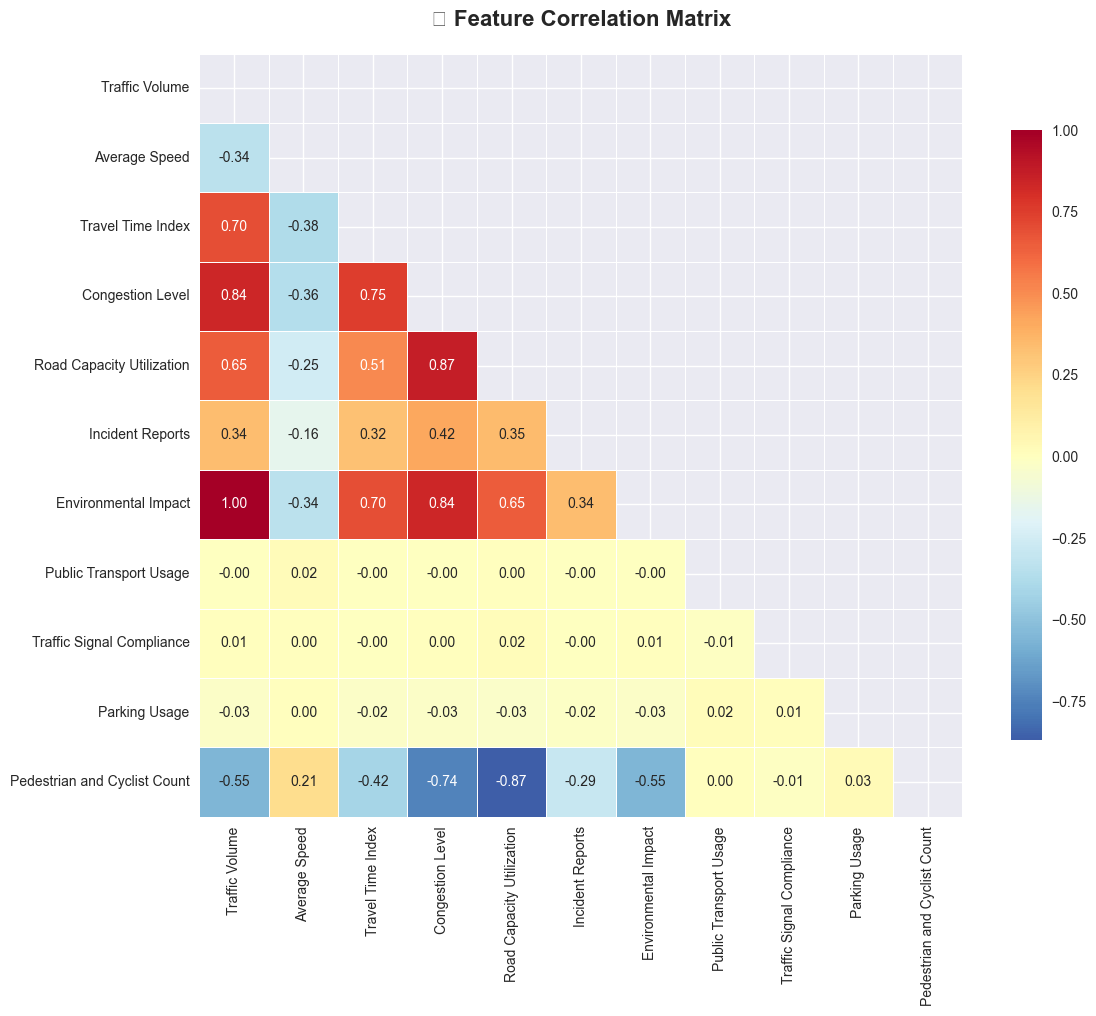


🔍 Strong Correlations (|r| > 0.5):
                    Feature 1                     Feature 2  Correlation
3              Traffic Volume          Environmental Impact     1.000000
12  Road Capacity Utilization  Pedestrian and Cyclist Count    -0.868422
8            Congestion Level     Road Capacity Utilization     0.865025
9            Congestion Level          Environmental Impact     0.837218
1              Traffic Volume              Congestion Level     0.837218
5           Travel Time Index              Congestion Level     0.751573
10           Congestion Level  Pedestrian and Cyclist Count    -0.738787
0              Traffic Volume             Travel Time Index     0.697514
7           Travel Time Index          Environmental Impact     0.697514
11  Road Capacity Utilization          Environmental Impact     0.652898
2              Traffic Volume     Road Capacity Utilization     0.652898
4              Traffic Volume  Pedestrian and Cyclist Count    -0.554718
13       Enviro

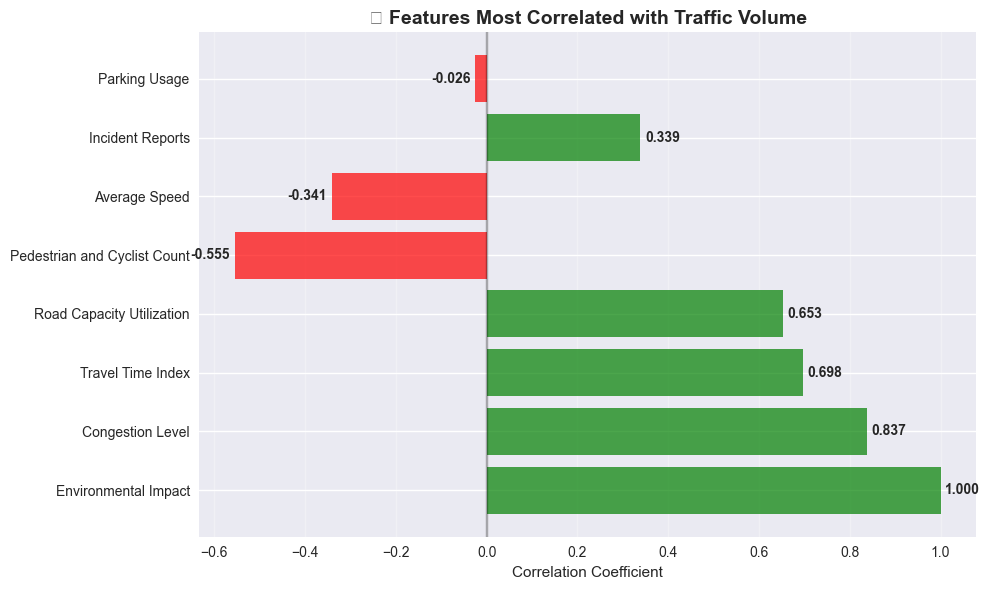


🎯 Feature Importance Analysis for Traffic Volume:
Top 5 most important features:
1. Environmental Impact: 1.000
2. Congestion Level: 0.837
3. Travel Time Index: 0.698
4. Road Capacity Utilization: 0.653
5. Pedestrian and Cyclist Count: 0.555


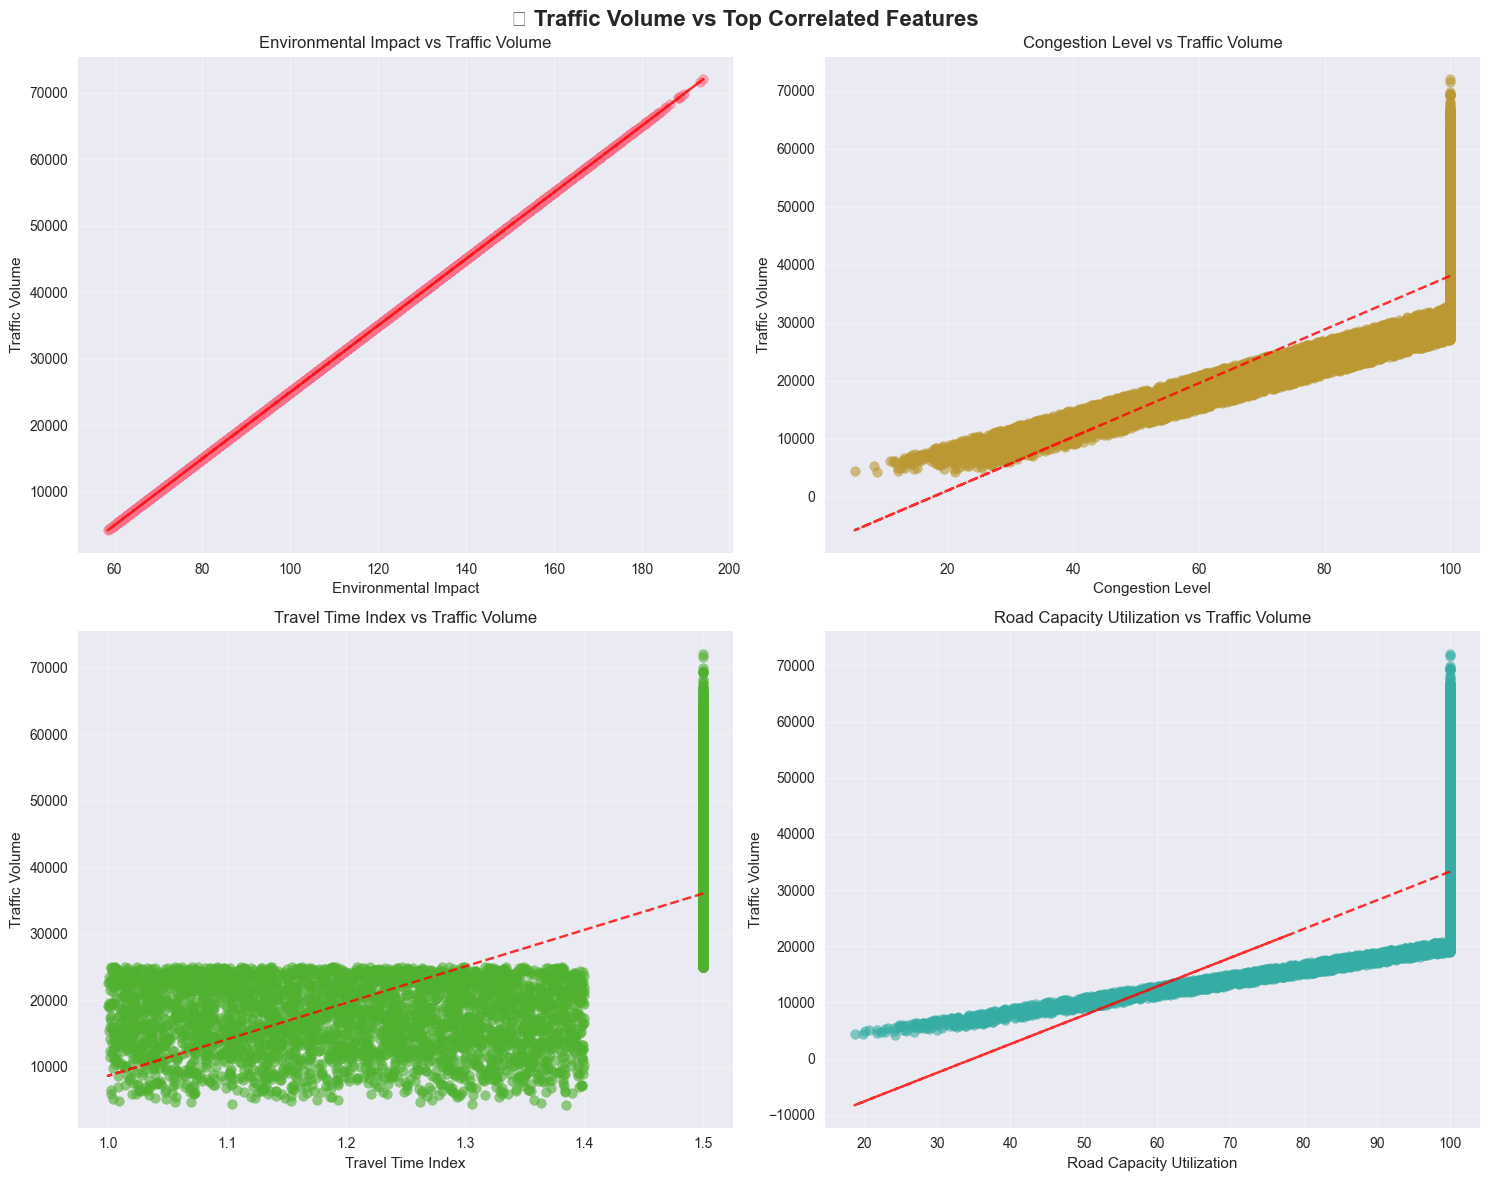

In [9]:
# Correlation analysis for numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"🔢 Numerical columns for correlation analysis: {numerical_cols}")

if len(numerical_cols) > 1:
    # Calculate correlation matrix
    correlation_matrix = df[numerical_cols].corr()
    
    # Visualization: Correlation Heatmap
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='RdYlBu_r', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, fmt='.2f')
    
    plt.title('🔗 Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()
    
    # Find strong correlations
    print("\n🔍 Strong Correlations (|r| > 0.5):")
    print("="*50)
    
    strong_correlations = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.5:
                strong_correlations.append({
                    'Feature 1': correlation_matrix.columns[i],
                    'Feature 2': correlation_matrix.columns[j],
                    'Correlation': corr_value
                })
    
    if strong_correlations:
        strong_corr_df = pd.DataFrame(strong_correlations)
        strong_corr_df = strong_corr_df.sort_values('Correlation', key=abs, ascending=False)
        print(strong_corr_df)
    else:
        print("No strong correlations found (|r| > 0.5)")
    
    # If we have a main congestion metric, show its correlations
    if main_metric in numerical_cols:
        congestion_corr = correlation_matrix[main_metric].sort_values(key=abs, ascending=False)
        congestion_corr = congestion_corr[congestion_corr.index != main_metric]  # Remove self-correlation
        
        print(f"\n🚦 Factors most correlated with {main_metric}:")
        print("="*50)
        for feature, corr in congestion_corr.head(5).items():
            direction = "positively" if corr > 0 else "negatively"
            print(f"• {feature}: {corr:.3f} ({direction} correlated)")
        
        # Visualization: Top correlations with main metric
        plt.figure(figsize=(10, 6))
        top_corr = congestion_corr.head(8)
        colors = ['red' if x < 0 else 'green' for x in top_corr.values]
        
        bars = plt.barh(range(len(top_corr)), top_corr.values, color=colors, alpha=0.7)
        plt.yticks(range(len(top_corr)), top_corr.index)
        plt.xlabel('Correlation Coefficient')
        plt.title(f'🔗 Features Most Correlated with {main_metric}', fontsize=14, fontweight='bold')
        plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
        
        # Add correlation values on bars
        for i, bar in enumerate(bars):
            width = bar.get_width()
            plt.text(width + (0.01 if width > 0 else -0.01), bar.get_y() + bar.get_height()/2,
                    f'{width:.3f}', ha='left' if width > 0 else 'right', va='center', fontweight='bold')
        
        plt.grid(True, alpha=0.3, axis='x')
        plt.tight_layout()
        plt.show()

else:
    print("⚠️ Insufficient numerical columns for correlation analysis")

# Feature importance analysis (if we have enough data)
if len(numerical_cols) > 2 and main_metric:
    print(f"\n🎯 Feature Importance Analysis for {main_metric}:")
    print("="*50)
    
    # Simple feature importance using correlation
    feature_importance = abs(correlation_matrix[main_metric]).sort_values(ascending=False)
    feature_importance = feature_importance[feature_importance.index != main_metric]
    
    print("Top 5 most important features:")
    for i, (feature, importance) in enumerate(feature_importance.head(5).items(), 1):
        print(f"{i}. {feature}: {importance:.3f}")
    
    # Scatter plots for top correlated features
    if len(feature_importance) >= 2:
        fig, axes = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle(f'📊 {main_metric} vs Top Correlated Features', fontsize=16, fontweight='bold')
        
        top_features = feature_importance.head(4).index
        
        for i, feature in enumerate(top_features):
            row, col = i // 2, i % 2
            axes[row, col].scatter(df[feature], df[main_metric], alpha=0.6, color=f'C{i}')
            axes[row, col].set_xlabel(feature)
            axes[row, col].set_ylabel(main_metric)
            axes[row, col].set_title(f'{feature} vs {main_metric}')
            axes[row, col].grid(True, alpha=0.3)
            
            # Add trend line
            z = np.polyfit(df[feature].dropna(), df[main_metric][df[feature].notna()], 1)
            p = np.poly1d(z)
            axes[row, col].plot(df[feature], p(df[feature]), "r--", alpha=0.8)
        
        plt.tight_layout()
        plt.show()